# Implement Autoencoder on MNIST dataset
1. Vanilla Autoencoder
2. Multilayer AE
3. Denoise AE
4. Conv AE

In [ ]:
# import the library
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
print('imported')

imported


In [ ]:
# load the MNIST data
(X_train,_),(X_test,_)=mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# reshape X_train & X_test & Normalize
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float')/255.
X_test=X_test.astype('float')/255.

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

# Vanilla Autoencoder

In [ ]:
# parameterts
input_size=784
hidden_size=64
output_size=784

# Neural network
---Sequential API,
---Functional API

In [ ]:
# Functional Keras API
from tensorflow.keras.layers import Input
x=Input(shape=(input_size))
h=Dense(hidden_size,activation='relu')(x)
r=Dense(output_size,activation='sigmoid')(h)

model_ae=Model(inputs=x,outputs=r)

In [ ]:
model_ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
model_ae.compile(optimizer='adam',loss='mse')

In [ ]:
epochs=5
batch_size=128

history=model_ae.fit(X_train,X_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(X_test,X_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0351 - val_loss: 0.0147
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0108 - val_loss: 0.0076
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0036 - val_loss: 0.0032


In [ ]:
model_ae.evaluate(X_test,X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0055


0.00553419953212142

In [ ]:
# predict on test images
decoded_imgs=model_ae.predict(X_test)

313/313 [==============================] - 1s 3ms/step


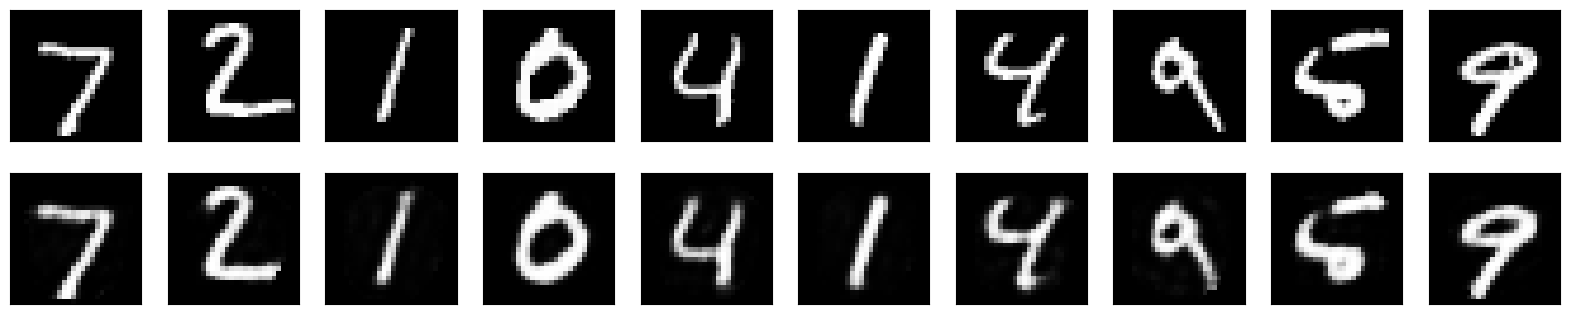

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# Print encoded/Compressed images
encoder=Model(x,h)
encoded_imgs=encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 3ms/step


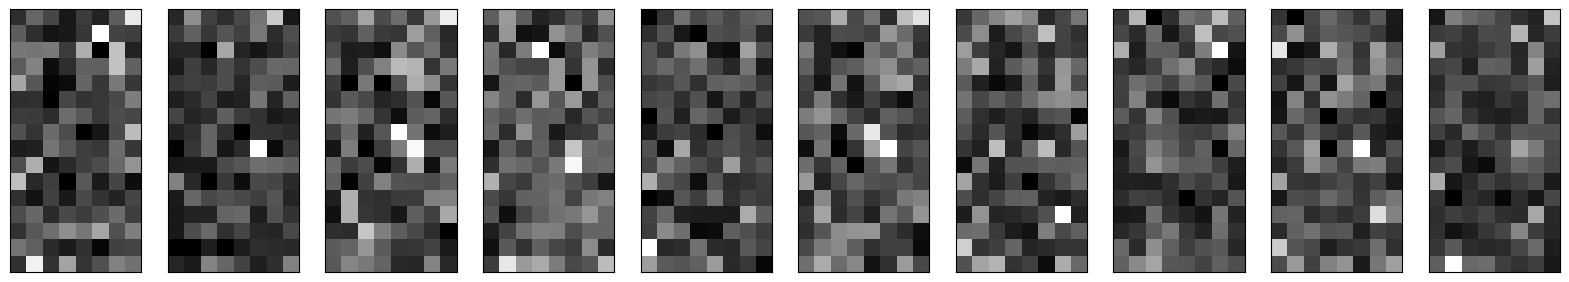

In [ ]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(-1,8, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Multilayer Autoencoder

In [ ]:
# parameters
input_size=784
hidden_size=128
code_size=64

In [ ]:
# encoder
x=Input(shape=(input_size,))
hidden_1=Dense(hidden_size,activation='relu')(x)

h=Dense(code_size,activation='relu')(hidden_1)

#decoder part
hidden_2=Dense(hidden_size,activation='relu')(h)
r=Dense(input_size,activation='sigmoid')(hidden_2)

autoencoder1=Model(inputs=x,outputs=r)

In [ ]:
autoencoder1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 218192 (852.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
autoencoder1.compile(optimizer='adam',loss='mse')

In [ ]:
epochs=5
batch_size=128

history=autoencoder1.fit(X_train,X_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(X_test,X_test))

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.0408 - val_loss: 0.0191
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0156 - val_loss: 0.0127
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0117 - val_loss: 0.0103
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0085 - val_loss: 0.0078


In [ ]:
autoencoder1.evaluate(X_test,X_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0078


0.007770969532430172

In [ ]:
# predict on test images
decoded_imgs=autoencoder1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


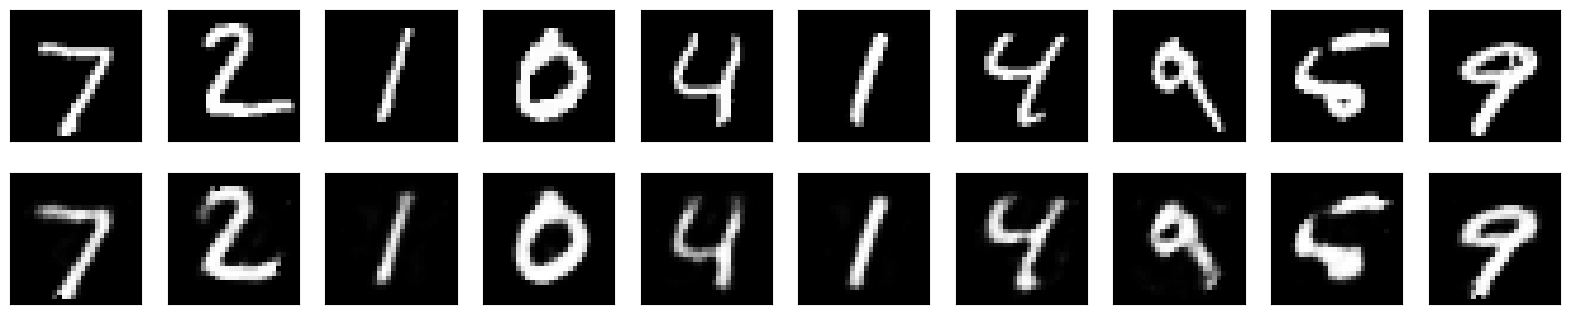

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Denoise Autoencoder

# create noisy input

# Input with noise

In [ ]:
# create noisy data
noise_factor=0.2
X_train_noisy=X_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=X_train.shape)
X_test_noisy=X_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=X_test.shape)

In [ ]:
X_train_noisy=np.clip(X_train_noisy,0.,1.)
X_test_noisy=np.clip(X_test_noisy,0.,1.)

In [ ]:
# create the model
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Dense(500,input_dim=784,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(784,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 500)               392500    
                                                                 
 dense_11 (Dense)            (None, 300)               150300    
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)               150500    
                                                                 
 dense_15 (Dense)            (None, 784)               392784    
                                                                 
Total params: 1146484 (4.37 MB)
Trainable params: 114648

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
epochs=5
batch_size=128

history=model.fit(X_train_noisy,X_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(X_test_noisy,X_test))

Epoch 1/5
469/469 [==============================] - 15s 30ms/step - loss: 0.0326 - val_loss: 0.0157
Epoch 2/5
469/469 [==============================] - 13s 29ms/step - loss: 0.0135 - val_loss: 0.0117
Epoch 3/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 4/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 5/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0084 - val_loss: 0.0080


In [ ]:
# predict on test images
decoded_imgs=model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


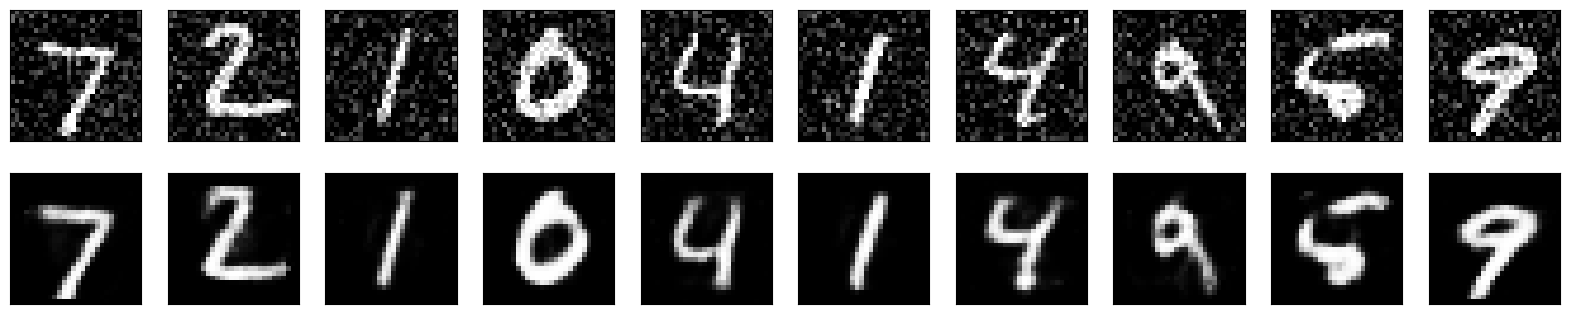

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# download the model
# pass any noisy input
# model.predict('image')

Develop model any noisy image ---

model will give clear image